<img align=center src="https://rhyme.com/assets/img/logo-dark.png"></img>
<h2 align=left> Understanding Deepfakes with Keras</h2>
<img align=center src="DCGAN.png"></img>

### Task 1: Importing Libraries and Helper Functions
Please note: If you haven't already, please install the required packages by executing the code cell below.

In [1]:
%matplotlib notebook

import tensorflow as tf
import numpy as np
import os
import tfutils

from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Conv2D, BatchNormalization
from tensorflow.keras.layers import Conv2DTranspose, Reshape, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from PIL import Image
import pandas as pd

print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.10.0


### Task 2: Importing and Plotting the Data

In [2]:
(x_train, y_train), (x_test, y_test) = tfutils.datasets.mnist.load_data(one_hot=False)

x_train = tfutils.datasets.mnist.load_subset([0], x_train, y_train)
x_test = tfutils.datasets.mnist.load_subset([0], x_test, y_test)

x = np.concatenate([x_train, x_test], axis=0)

<IPython.core.display.Javascript object>


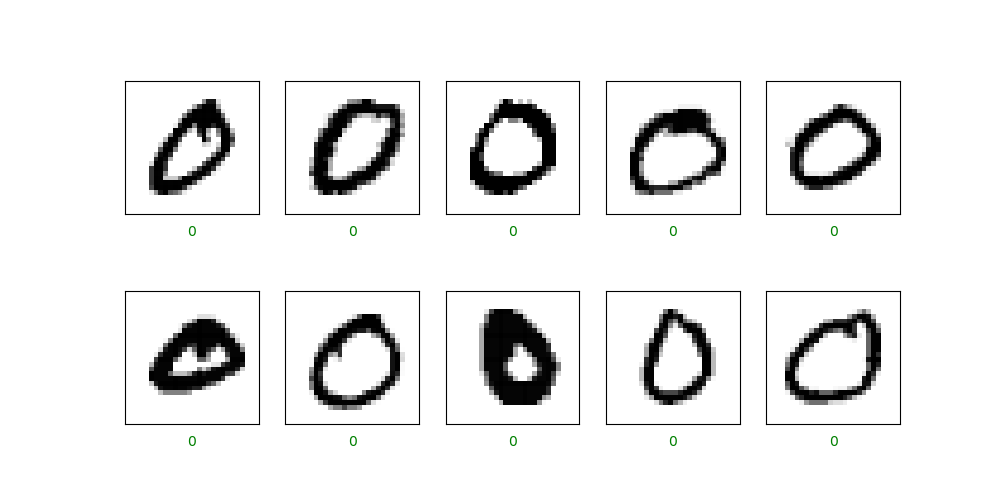

In [3]:
tfutils.datasets.mnist.plot_ten_random_examples(plt, x, np.zeros((x.shape[0], 1))).show()

<h2 align=left> Task 3: Discriminatore </h2>
<img align=center src="artist_critic.png"></img>

In [4]:
discriminator = Sequential([
    Conv2D(64, 3, strides=2, input_shape=(28, 28, 1)),
    LeakyReLU(),
    BatchNormalization(),
    
    Conv2D(128, 5, strides=2),
    LeakyReLU(),
    BatchNormalization(),
    
    Conv2D(256, 5, strides=2),
    LeakyReLU(),
    BatchNormalization(),
    
    Flatten(),
    Dense(1, activation='sigmoid')
    
])


opt = tf.keras.optimizers.Adam(lr=2e-4, beta_1=0.5)

discriminator.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
discriminator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 13, 13, 64)        640       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 13, 13, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 13, 13, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 128)         204928    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 5, 5, 128)         0         
                                                                 
 batch_normalization_1 (Batc  (None, 5, 5, 128)        512       
 hNormalization)                                        

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


<h2 align=left> Task 4: Generator </h2>

In [6]:
generator = Sequential([
    Dense(256, activation='relu', input_shape=(1, )),
    Reshape((1, 1, 256)),
    
    Conv2DTranspose(256, 5, activation='relu'),
    BatchNormalization(),
    
    Conv2DTranspose(128, 5, activation='relu'),
    BatchNormalization(),
    
    Conv2DTranspose(64, 5, strides=2, activation='relu'),
    BatchNormalization(),
    
    Conv2DTranspose(32, 5, activation='relu'),
    BatchNormalization(),
    
    Conv2DTranspose(1, 4, activation='sigmoid'),
    BatchNormalization(),
])

generator.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               512       
                                                                 
 reshape_1 (Reshape)         (None, 1, 1, 256)         0         
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 5, 5, 256)        1638656   
 ranspose)                                                       
                                                                 
 batch_normalization_7 (Batc  (None, 5, 5, 256)        1024      
 hNormalization)                                                 
                                                                 
 conv2d_transpose_5 (Conv2DT  (None, 9, 9, 128)        819328    
 ranspose)                                                       
                                                      

1/1 [==============================] - 6s 6s/step


<IPython.core.display.Javascript object>


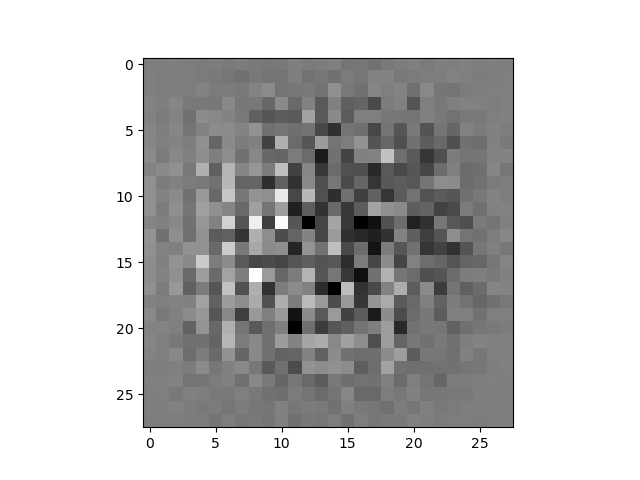

In [7]:
noise = np.random.randn(1, 1)
gen_image = generator.predict(noise)[0]

plt.figure()
plt.imshow(np.reshape(gen_image, (28, 28)), cmap='binary')
plt.show()

<h2 align=left> Task 5: Generative Adversarial Network (GAN) </h2>

In [10]:
input_layer = tf.keras.layers.Input(shape=(1, ))
gen_out = generator(input_layer)
disc_out = discriminator (gen_out)

gan = Model(
    input_layer,
    disc_out
)

discriminator.trainable = False
gan.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
gan.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 sequential_2 (Sequential)   (None, 28, 28, 1)         2717029   
                                                                 
 sequential (Sequential)     (None, 1)                 1027073   
                                                                 
Total params: 3,744,102
Trainable params: 2,716,067
Non-trainable params: 1,028,035
_________________________________________________________________


<h2 align=left> Task 6 and 7: Training the GAN </h2>

In [14]:
epochs = 25
batch_size = 128
steps_per_epoch = int(2 * x.shape[0]/batch_size)

print('Steps per epoch = ', steps_per_epoch)

Steps per epoch =  107


<IPython.core.display.Javascript object>


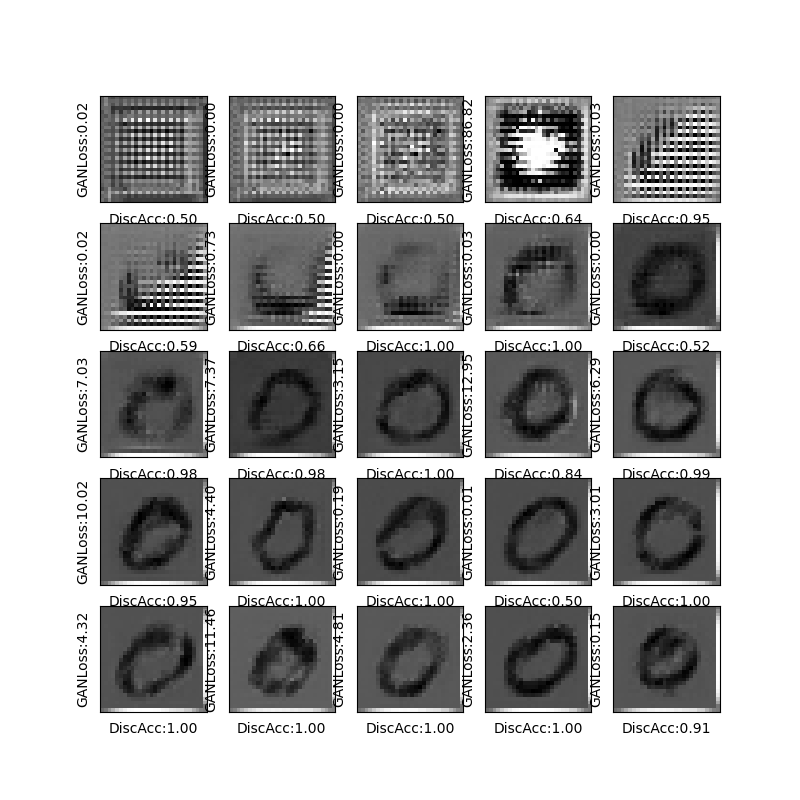

2/2 [==============================] - 0s 146ms/step


2/2 [==============================] - 0s 148ms/step


2/2 [==============================] - 0s 151ms/step


2/2 [==============================] - 0s 146ms/step


2/2 [==============================] - 0s 136ms/step


2/2 [==============================] - 0s 150ms/step


2/2 [==============================] - 0s 144ms/step


2/2 [==============================] - 0s 149ms/step


2/2 [==============================] - 0s 152ms/step


2/2 [==============================] - 0s 149ms/step


2/2 [==============================] - 0s 150ms/step


2/2 [==============================] - 0s 149ms/step


2/2 [==============================] - 0s 151ms/step


2/2 [==============================] - 0s 155ms/step


2/2 [==============================] - 0s 151ms/step


2/2 [==============================] - 0s 156ms/step


2/2 [==============================] - 0s 156ms/step


1/1 [==============================] - 0s 25ms/step


In [17]:
dp = tfutils.plotting.DynamicPlot(plt, 5, 5, (8, 8))

for e in range (0, epochs):
    dp.start_of_epoch(e)
    
    for step in range(0, steps_per_epoch):
        true_examples = x[int(batch_size/2)*step:int(batch_size/2)*(step+1)]
        true_examples = np.reshape(true_examples, (true_examples.shape[0], 28, 28, 1))
        
        noise = np.random.randn(int(batch_size/2), 1)
        gen_examples = generator.predict(noise)
        
        x_batch = np.concatenate([gen_examples, true_examples], axis=0)
        y_batch = np.array([0]*int(batch_size/2) + [1]*int(batch_size/2))
        
        indices = np.random.choice(range(batch_size), batch_size, replace=False)
        
        x_batch = x_batch[indices]
        y_batch = y_batch[indices]
        
        discriminator.trainable = True
        discriminator.train_on_batch(x_batch, y_batch)
        discriminator.trainable = False
        
        loss, _ = gan.train_on_batch(noise, np.ones((int(batch_size/2), 1)))
        _, acc = discriminator.evaluate(x_batch, y_batch, verbose=False)
        
    noise = np.random.randn(1, 1)
    gen_image = generator.predict(noise)[0]
    gen_image = np.reshape(gen_image, (28, 28))
    dp.end_of_epoch(gen_image, 'binary', 'DiscAcc:{:.2f}'.format(acc), 'GANLoss:{:.2f}'.format(loss))